<a href="https://colab.research.google.com/github/truongthuanr/self-learning-project/blob/main/05_SentimentAnalysis.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Information


**Data:** 
* Kaggle: [Amazon Fine Food Reviews](https://www.kaggle.com/snap/amazon-fine-food-reviews)

**Problem:**
* To determine whether a review is positive or negative

**Reference:**
* [A Beginner’s Guide to Sentiment Analysis](https://towardsdatascience.com/a-beginners-guide-to-sentiment-analysis-in-python-95e354ea84f6)
* [A Complete Step by Step Tutorial on Sentiment Analysis in Keras and Tensorflow](https://towardsdatascience.com/a-complete-step-by-step-tutorial-on-sentiment-analysis-in-keras-and-tensorflow-ea420cc8913f)
* [A Step-by-Step Tutorial for Conducting Sentiment Analysis](https://towardsdatascience.com/a-step-by-step-tutorial-for-conducting-sentiment-analysis-a7190a444366)

# Import data

In [142]:
import pandas as pd

In [143]:
df_org = pd.read_csv("/content/drive/MyDrive/01_Personal/01_Study/01_ML/03_FoodReviews/Dataset/Reviews.csv")

In [144]:
df_org.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 568454 entries, 0 to 568453
Data columns (total 10 columns):
 #   Column                  Non-Null Count   Dtype 
---  ------                  --------------   ----- 
 0   Id                      568454 non-null  int64 
 1   ProductId               568454 non-null  object
 2   UserId                  568454 non-null  object
 3   ProfileName             568438 non-null  object
 4   HelpfulnessNumerator    568454 non-null  int64 
 5   HelpfulnessDenominator  568454 non-null  int64 
 6   Score                   568454 non-null  int64 
 7   Time                    568454 non-null  int64 
 8   Summary                 568427 non-null  object
 9   Text                    568454 non-null  object
dtypes: int64(5), object(5)
memory usage: 43.4+ MB


In [145]:
df_org.head(5)

,Id,ProductId,UserId,ProfileName,HelpfulnessNumerator,HelpfulnessDenominator,Score,Time,Summary,Text
0,1,B001E4KFG0,A3SGXH7AUHU8GW,delmartian,1,1,5,1303862400,Good Quality Dog Food,I have bought several of the Vitality canned d...
1,2,B00813GRG4,A1D87F6ZCVE5NK,dll pa,0,0,1,1346976000,Not as Advertised,Product arrived labeled as Jumbo Salted Peanut...
2,3,B000LQOCH0,ABXLMWJIXXAIN,"Natalia Corres ""Natalia Corres""",1,1,4,1219017600,"""Delight"" says it all",This is a confection that has been around a fe...
3,4,B000UA0QIQ,A395BORC6FGVXV,Karl,3,3,2,1307923200,Cough Medicine,If you are looking for the secret ingredient i...
4,5,B006K2ZZ7K,A1UQRSCLF8GW1T,"Michael D. Bigham ""M. Wassir""",0,0,5,1350777600,Great taffy,Great taffy at a great price. There was a wid...


# Exploratory Data Analysis 

In [146]:
# Import Plotly library
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px

Check null data

In [147]:
df_org.isna().sum()

Id                         0
ProductId                  0
UserId                     0
ProfileName               16
HelpfulnessNumerator       0
HelpfulnessDenominator     0
Score                      0
Time                       0
Summary                   27
Text                       0
dtype: int64

In [150]:
df_org.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 568411 entries, 0 to 568453
Data columns (total 10 columns):
 #   Column                  Non-Null Count   Dtype 
---  ------                  --------------   ----- 
 0   Id                      568411 non-null  int64 
 1   ProductId               568411 non-null  object
 2   UserId                  568411 non-null  object
 3   ProfileName             568411 non-null  object
 4   HelpfulnessNumerator    568411 non-null  int64 
 5   HelpfulnessDenominator  568411 non-null  int64 
 6   Score                   568411 non-null  int64 
 7   Time                    568411 non-null  int64 
 8   Summary                 568411 non-null  object
 9   Text                    568411 non-null  object
dtypes: int64(5), object(5)
memory usage: 47.7+ MB


There are 43 row contain na data, very small than total 568454 row. -> Delete row have NA data

In [151]:
df_org.dropna(axis=0, inplace=True)

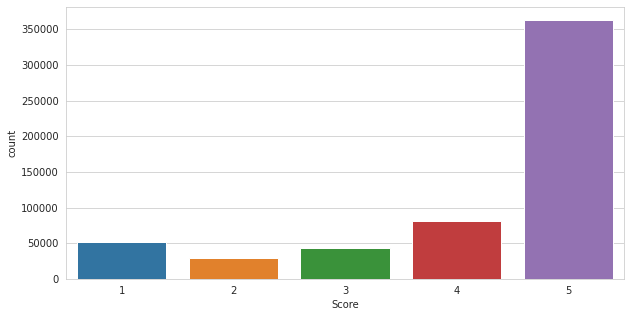

In [152]:
# Check product score
fig = plt.figure(figsize=(10,5))
sns.set_style("whitegrid")
ax = sns.countplot(x=df_org["Score"])

Almost review is scored by 5 -> most customer rating positive.

Get 10% data for analyze to optimize time

In [153]:
num = round(len(df)*0.1)
df = df_org.sample(frac=1, random_state=40)[:num]

In [154]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 5255 entries, 252319 to 123414
Data columns (total 10 columns):
 #   Column                  Non-Null Count  Dtype 
---  ------                  --------------  ----- 
 0   Id                      5255 non-null   int64 
 1   ProductId               5255 non-null   object
 2   UserId                  5255 non-null   object
 3   ProfileName             5255 non-null   object
 4   HelpfulnessNumerator    5255 non-null   int64 
 5   HelpfulnessDenominator  5255 non-null   int64 
 6   Score                   5255 non-null   int64 
 7   Time                    5255 non-null   int64 
 8   Summary                 5255 non-null   object
 9   Text                    5255 non-null   object
dtypes: int64(5), object(5)
memory usage: 451.6+ KB


Check the most frequently used word in the reviews...

In [155]:
import nltk
from nltk.corpus import stopwords
from wordcloud import WordCloud, STOPWORDS, ImageColorGenerator

In [156]:
# Create stopwords list
vocab = "".join(review for review in df.Text)
stopwords = set(STOPWORDS)
stopwords.update(["br", "href"])
wordclouds = WordCloud(stopwords=stopwords).generate(vocab)

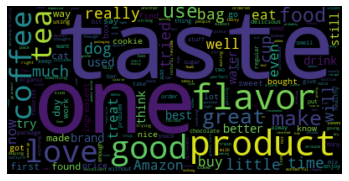

In [157]:
plt.imshow(wordclouds, interpolation='bilinear')
plt.axis("off")
plt.show()

Classify: 

Review with `Score` > 3 is positive

Review with `Score` < 3 is nagative

Review with `Score` = 3 is removed

In [158]:
df = df[df["Score"]!=3]
df["Sentiment"] = df["Score"].apply(lambda x : 1 if x>3 else -1)

In [159]:
df.isna().sum()

Id                        0
ProductId                 0
UserId                    0
ProfileName               0
HelpfulnessNumerator      0
HelpfulnessDenominator    0
Score                     0
Time                      0
Summary                   0
Text                      0
Sentiment                 0
dtype: int64

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning:

Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.



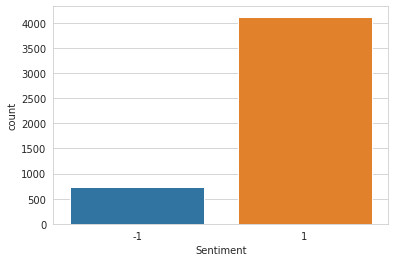

In [160]:
sns.countplot(df["Sentiment"])

## More Exploratory Data

In [161]:
# split df - positive and negative sentiment:
positive = df[df['Sentiment'] == 1]
negative = df[df['Sentiment'] == -1]

WordCloud for positive review

(-0.5, 399.5, 199.5, -0.5)

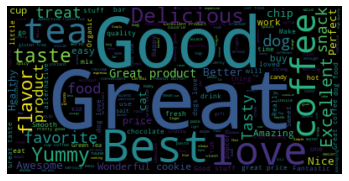

In [162]:
stopwords = set(STOPWORDS)
stopwords.update(["br", "href"]) 
## good and great removed because they were included in negative sentiment
pos = " ".join(review for review in positive.Summary)

wordcloud2 = WordCloud(stopwords=stopwords).generate(pos)
plt.imshow(wordcloud2, interpolation='bilinear')
plt.axis("off")

WordCloud for nagative review

(-0.5, 399.5, 199.5, -0.5)

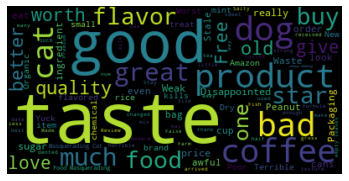

In [163]:
neg = "".join(review for review in negative.Summary)
wordcloud3 = WordCloud(stopwords=stopwords).generate(neg)

plt.imshow(wordcloud3, interpolation='bilinear')
plt.axis("off")

Some word like [good, great, taste, coffee, ..] is in both negative and positive review

**Positive review:** contain the positive word such as "best, love, yummy, excellent, favorite,.."

**Negative review:** contain negative word such as "worth, bad, awful, waste, .."

In [84]:
nltk.download('stopwords')

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.


True

In [81]:
import string
from nltk.corpus import stopwords

In [118]:
# Create a function to process the text
def text_process(mess):
  """
  Takes in a string of text, then performs the following:
  1. Remove all punctuation
  2. Remove all stop words
  3. Return a list of the cleaned text
  """
  # remove the punctuation in the string
  nopunc = [char for char in mess if char not in string.punctuation]
  nopunc = ''.join(nopunc)

  # remove all stop words
  ret = [word for word in nopunc.split() if word.lower() not in stopwords.words('english')]

  return ret

In [119]:
# Quick check
df.Text.head(5).apply(text_process)

33854     [bag, 3729, 15, pounds, works, 250, per, pound...
203005    [flavoring, still, needs, work, man, oh, man, ...
362966    [bought, olives, originally, make, Sicilian, s...
201573    [Nice, heavier, sturdier, expected, problem, c...
46346     [price, stinks, horribly, especially, pay, shi...
Name: Text, dtype: object